In [42]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)

In [3]:
data=pd.read_csv("~/Downloads/MovieGenre.csv",encoding='latin1')

In [4]:
data.head()

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...


In [5]:
data.tail()

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
40103,83168,http://www.imdb.com/title/tt83168,Tanya's Island (1980),4.3,Drama,https://images-na.ssl-images-amazon.com/images...
40104,82875,http://www.imdb.com/title/tt82875,Pacific Banana (1981),4.7,Comedy,https://images-na.ssl-images-amazon.com/images...
40105,815258,http://www.imdb.com/title/tt815258,Werewolf in a Womens Prison (2006),4.5,Horror,https://images-na.ssl-images-amazon.com/images...
40106,79142,http://www.imdb.com/title/tt79142,Xiao zi ming da (1979),6.5,Action|Comedy,https://images-na.ssl-images-amazon.com/images...
40107,70710,http://www.imdb.com/title/tt70710,Snatched (1973),6.5,Crime|Drama|Thriller,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40108 entries, 0 to 40107
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   imdbId      40108 non-null  int64  
 1   Imdb Link   40108 non-null  object 
 2   Title       40108 non-null  object 
 3   IMDB Score  40060 non-null  float64
 4   Genre       39963 non-null  object 
 5   Poster      39383 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.8+ MB


In [ ]:
data=data.drop(['Poster'], axis=1)

In [8]:
data.head()

,imdbId,Imdb Link,Title,IMDB Score,Genre
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance


In [9]:
data.count()

imdbId        40108
Imdb Link     40108
Title         40108
IMDB Score    40060
Genre         39963
dtype: int64

In [10]:
data=data.drop_duplicates(keep='first')

In [11]:
data.count()

imdbId        39515
Imdb Link     39515
Title         39515
IMDB Score    39467
Genre         39370
dtype: int64

In [12]:
data.shape

(39515, 5)

In [13]:
data['IMDB Score'].describe()

count    39467.000000
mean         6.415461
std          1.142768
min          1.200000
25%          5.800000
50%          6.600000
75%          7.200000
max          9.500000
Name: IMDB Score, dtype: float64

In [14]:
data.dtypes

imdbId          int64
Imdb Link      object
Title          object
IMDB Score    float64
Genre          object
dtype: object

In [15]:
print(data.isnull().sum())

imdbId          0
Imdb Link       0
Title           0
IMDB Score     48
Genre         145
dtype: int64


In [16]:
data = data.dropna() 
data.count()

imdbId        39324
Imdb Link     39324
Title         39324
IMDB Score    39324
Genre         39324
dtype: int64

In [19]:
C = data.set_index('imdbId').Genre.str.split('|', expand=True).stack()
C

imdbId   
114709  0    Animation
        1    Adventure
        2       Comedy
113497  0       Action
        1    Adventure
               ...    
79142   0       Action
        1       Comedy
70710   0        Crime
        1        Drama
        2     Thriller
Length: 84772, dtype: object

In [21]:
df=pd.get_dummies(C).groupby(level=0).sum()
df.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
imdbId,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
12,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
14,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
df1=data.merge(df, how='left', on='imdbId')
df1.head()

,imdbId,Imdb Link,Title,IMDB Score,Genre,Action,Adult,Adventure,Animation,Biography,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [26]:
df1=df1.drop(['Imdb Link','Title'], axis=1)

In [27]:
df1.head()

,imdbId,IMDB Score,Genre,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,114709,8.3,Animation|Adventure|Comedy,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,113497,6.9,Action|Adventure|Family,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,113228,6.6,Comedy|Romance,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,114885,5.7,Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,113041,5.9,Comedy|Family|Romance,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [30]:
#let's sort the data based on IMDB Score
df1 = df1.sort_values(by ='IMDB Score' ,ascending=False)

In [31]:
df1.head()

,imdbId,IMDB Score,Genre,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
37733,795176,9.5,Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7347,185906,9.5,Action|Drama|History,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17008,252487,9.5,Comedy|Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
36870,365559,9.4,Documentary|Music,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22246,2779318,9.4,Adventure|Drama|Family,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


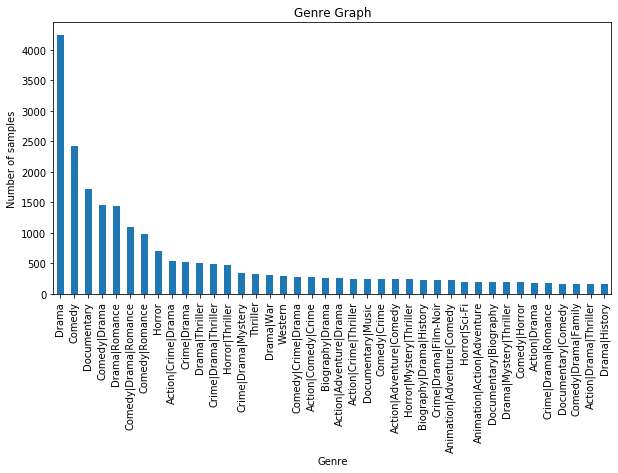

In [41]:
df1.Genre.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Genre Graph")
plt.ylabel('Number of samples')
plt.xlabel('Genre');
#Most of the samples are with Genre Category Drama, followed by comedy

,imdbId,IMDB Score,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
imdbId,1.000000,-0.064912,-0.003011,-0.005149,-0.041162,0.028908,0.052449,-0.042117,-0.064853,0.189771,...,0.069686,0.013777,-0.065256,-0.005000,0.008304,0.012186,0.018194,0.046325,-0.057754,-0.079308
IMDB Score,-0.064912,1.000000,-0.150866,-0.027488,-0.037200,0.077564,0.128658,-0.081868,0.013717,0.247788,...,0.035098,-0.004461,0.039105,-0.183961,0.083854,0.020763,0.017667,-0.162968,0.074880,-0.007296
Action,-0.003011,-0.150866,1.000000,-0.007404,0.247951,0.061045,-0.059462,-0.094581,0.157262,-0.120634,...,-0.017935,-0.002798,-0.124960,0.127490,-0.040150,-0.020027,-0.005235,0.061098,-0.012169,-0.018595
Adult,-0.005149,-0.027488,-0.007404,1.000000,-0.006134,0.002528,0.001885,-0.007081,-0.007346,-0.001621,...,-0.000863,-0.000135,-0.004364,-0.004351,0.005209,-0.002524,-0.000252,-0.006985,-0.003275,-0.002786
Adventure,-0.041162,-0.037200,0.247951,-0.006134,1.000000,0.218863,-0.032962,-0.032187,-0.071509,-0.082162,...,-0.011067,-0.002318,-0.090320,0.043185,-0.026670,-0.032281,-0.004337,-0.076735,-0.030237,0.007076
Animation,0.028908,0.077564,0.061045,0.002528,0.218863,1.000000,-0.039350,0.021053,-0.066962,-0.060575,...,-0.007084,-0.001529,-0.085390,-0.001290,0.259926,-0.028681,-0.002861,-0.076326,-0.035750,-0.029947
Biography,0.052449,0.128658,-0.059462,0.001885,-0.032962,-0.039350,1.000000,-0.116552,-0.024306,0.164449,...,0.015192,-0.001631,-0.057945,-0.050600,-0.027840,0.091402,-0.003052,-0.079266,-0.011230,-0.024056
Comedy,-0.042117,-0.081868,-0.094581,-0.007081,-0.032187,0.021053,-0.116552,1.000000,-0.073665,-0.167558,...,-0.027587,-0.004864,0.127173,-0.079914,-0.011150,-0.012641,0.007278,-0.209495,-0.079804,-0.050808
Crime,-0.064853,0.013717,0.157262,-0.007346,-0.071509,-0.066962,-0.024306,-0.073665,1.000000,-0.098963,...,-0.012845,-0.002776,-0.105710,-0.071534,-0.058575,-0.041751,-0.005194,0.127476,-0.063541,-0.048100
Documentary,0.189771,0.247788,-0.120634,-0.001621,-0.082162,-0.060575,0.164449,-0.167558,-0.098963,1.000000,...,0.137718,0.021780,-0.134144,-0.069606,0.040890,0.071392,-0.004369,-0.118553,0.006960,-0.044777


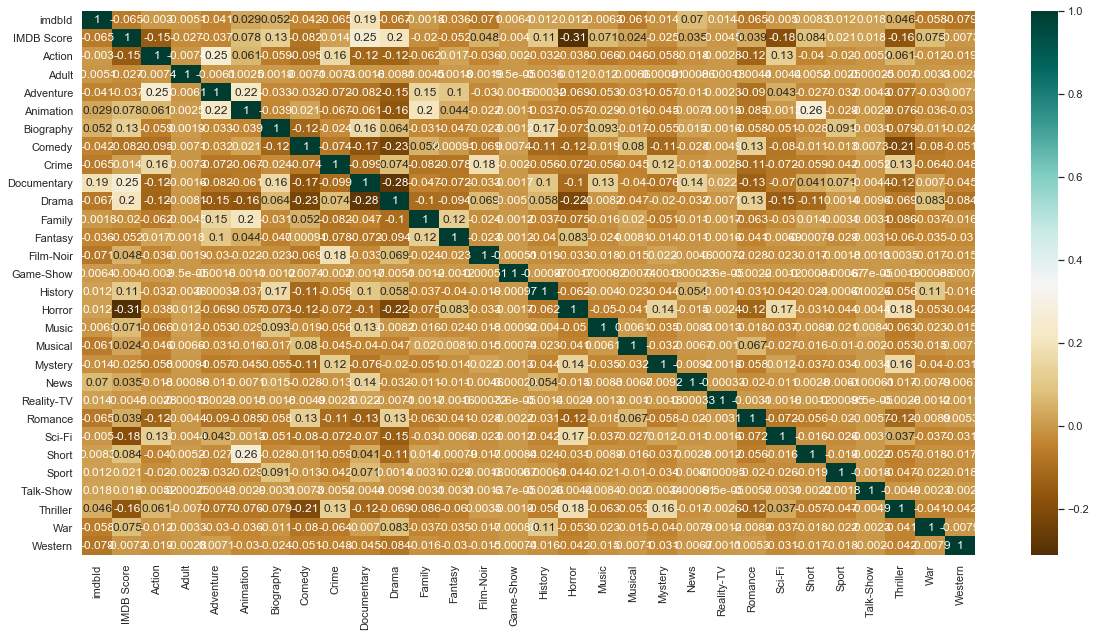

In [44]:
plt.figure(figsize=(20,10))
c= df1.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c
#from this heat map, it is clear that, IMDB Score mostly depends on Genre of category - Documentary, Drama, Biography, History

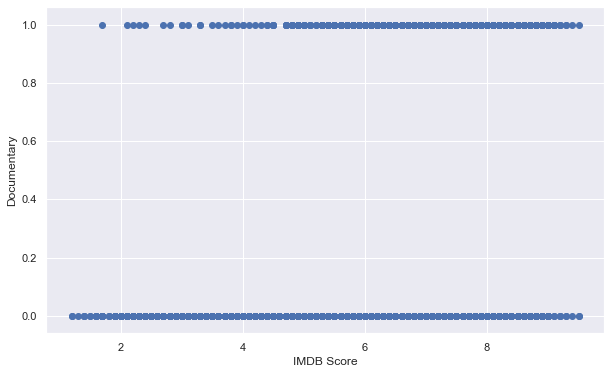

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df1['IMDB Score'], df1['Documentary'])
ax.set_xlabel('IMDB Score')
ax.set_ylabel('Documentary')
plt.show()

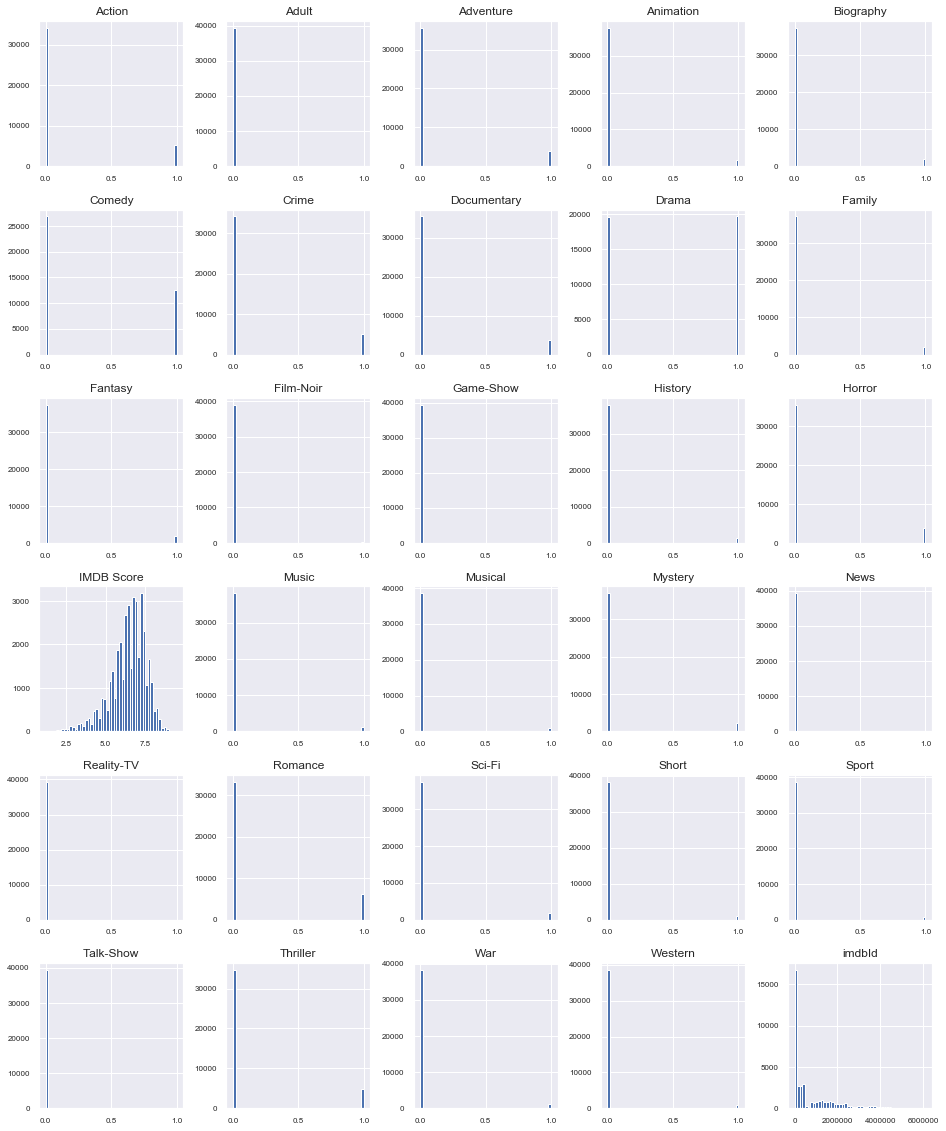

In [47]:
df1.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

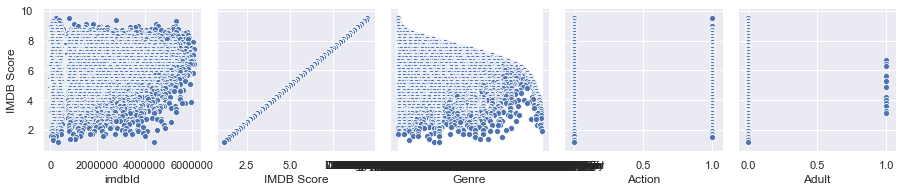

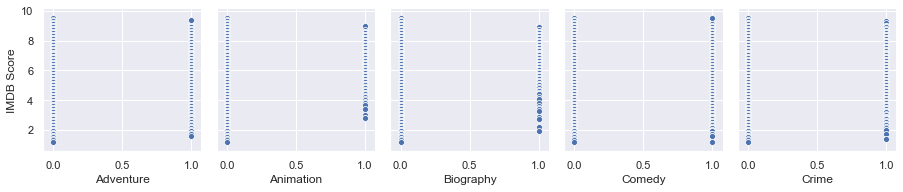

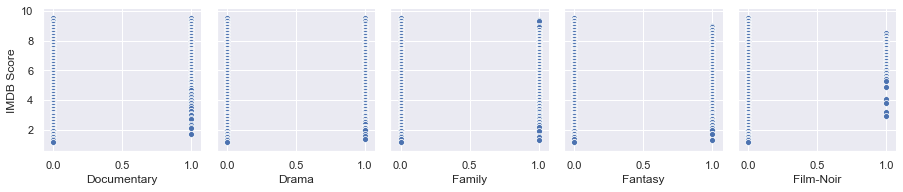

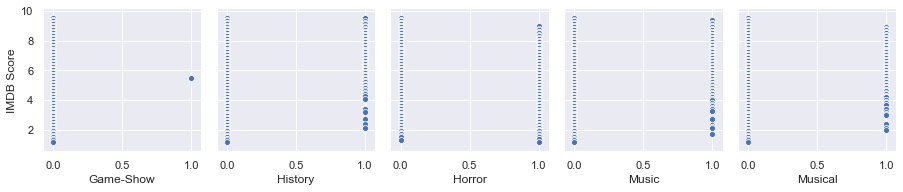

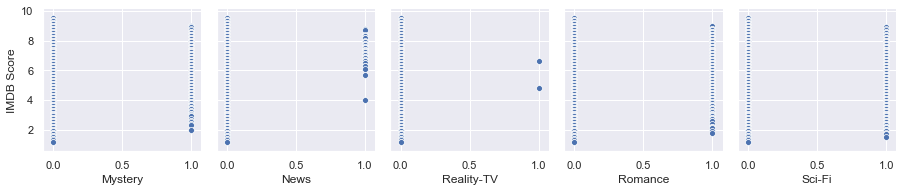

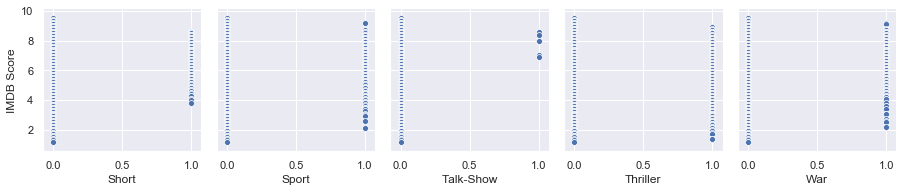

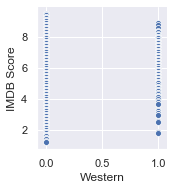

In [49]:
for i in range(0, len(df1.columns), 5):
    sns.pairplot(data=df1,
                x_vars=df1.columns[i:i+5],
                y_vars=['IMDB Score'])

In [65]:
df1.dtypes

imdbId           int64
IMDB Score     float64
Genre           object
Action           uint8
Adult            uint8
Adventure        uint8
Animation        uint8
Biography        uint8
Comedy           uint8
Crime            uint8
Documentary      uint8
Drama            uint8
Family           uint8
Fantasy          uint8
Film-Noir        uint8
Game-Show        uint8
History          uint8
Horror           uint8
Music            uint8
Musical          uint8
Mystery          uint8
News             uint8
Reality-TV       uint8
Romance          uint8
Sci-Fi           uint8
Short            uint8
Sport            uint8
Talk-Show        uint8
Thriller         uint8
War              uint8
Western          uint8
dtype: object

In [88]:
dummy=df1.drop(['imdbId','Genre'], axis=1)

In [70]:
dummy.head()

,IMDB Score,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
37733,9.5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7347,9.5,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
17008,9.5,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
36870,9.4,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
22246,9.4,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [90]:
dummy[dummy.columns[0:]].corr()['IMDB Score'][:-1]
#can find the co-relation between IMDB Score with all other Genres

IMDB Score     1.000000
Action        -0.150866
Adult         -0.027488
Adventure     -0.037200
Animation      0.077564
Biography      0.128658
Comedy        -0.081868
Crime          0.013717
Documentary    0.247788
Drama          0.201307
Family        -0.020413
Fantasy       -0.051857
Film-Noir      0.047891
Game-Show     -0.004037
History        0.113794
Horror        -0.310724
Music          0.070594
Musical        0.023744
Mystery       -0.024562
News           0.035098
Reality-TV    -0.004461
Romance        0.039105
Sci-Fi        -0.183961
Short          0.083854
Sport          0.020763
Talk-Show      0.017667
Thriller      -0.162968
War            0.074880
Name: IMDB Score, dtype: float64

corelation